In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial import distance
import sys
import os
from pathlib import Path

sys.path.append("scripts/")

import utils
import distclassipy as dcpy

cd = dcpy.Distance()

In [2]:
sns.set_theme(
    context="paper",
    style="whitegrid",
    font_scale=1.5,
    rc={
        "xtick.bottom": True,
        "xtick.top": False,
        "ytick.left": True,
        "ytick.right": False,
        "axes.grid": False,
        "axes.edgecolor": ".15",
    },
)

In [3]:
ref_point = np.array([5, 5])  # reference point

In [4]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
points = np.vstack([X.ravel(), Y.ravel()]).T

In [5]:
metric = cd.add_chisq  # canberra
metric_str = utils.get_metric_name(metric)

In [6]:
distances = distance.cdist(ref_point.reshape(1, -1), points, metric=metric)
distances = distances.reshape(X.shape)

In [7]:
from matplotlib import ticker, cm

In [8]:
all_metrics = [
    "euclidean",
    "braycurtis",
    "canberra",
    "cityblock",
    "chebyshev",
    cd.clark,
    # "correlation",
    "cosine",
    cd.hellinger,
    cd.jaccard,
    cd.lorentzian,
    # cd.marylandbridge,
    cd.meehl,
    cd.motyka,
    cd.soergel,
    cd.wave_hedges,
    cd.kulczynski,
    cd.add_chisq,  # LOG ONES
]
print(len(all_metrics))

16


In [9]:
plt.rcParams["figure.dpi"] = 300

/var/folders/2d/ht34x6mn7hx9d1sv4g_j8nfr0000gn/T/ipykernel_18349/2282670548.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0, 2, 4, 6, 8, 10])
/var/folders/2d/ht34x6mn7hx9d1sv4g_j8nfr0000gn/T/ipykernel_18349/2282670548.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0, 2, 4, 6, 8, 10])
/var/folders/2d/ht34x6mn7hx9d1sv4g_j8nfr0000gn/T/ipykernel_18349/2282670548.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0, 2, 4, 6, 8, 10])
/var/folders/2d/ht34x6mn7hx9d1sv4g_j8nfr0000gn/T/ipykernel_18349/2282670548.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0, 2, 4,

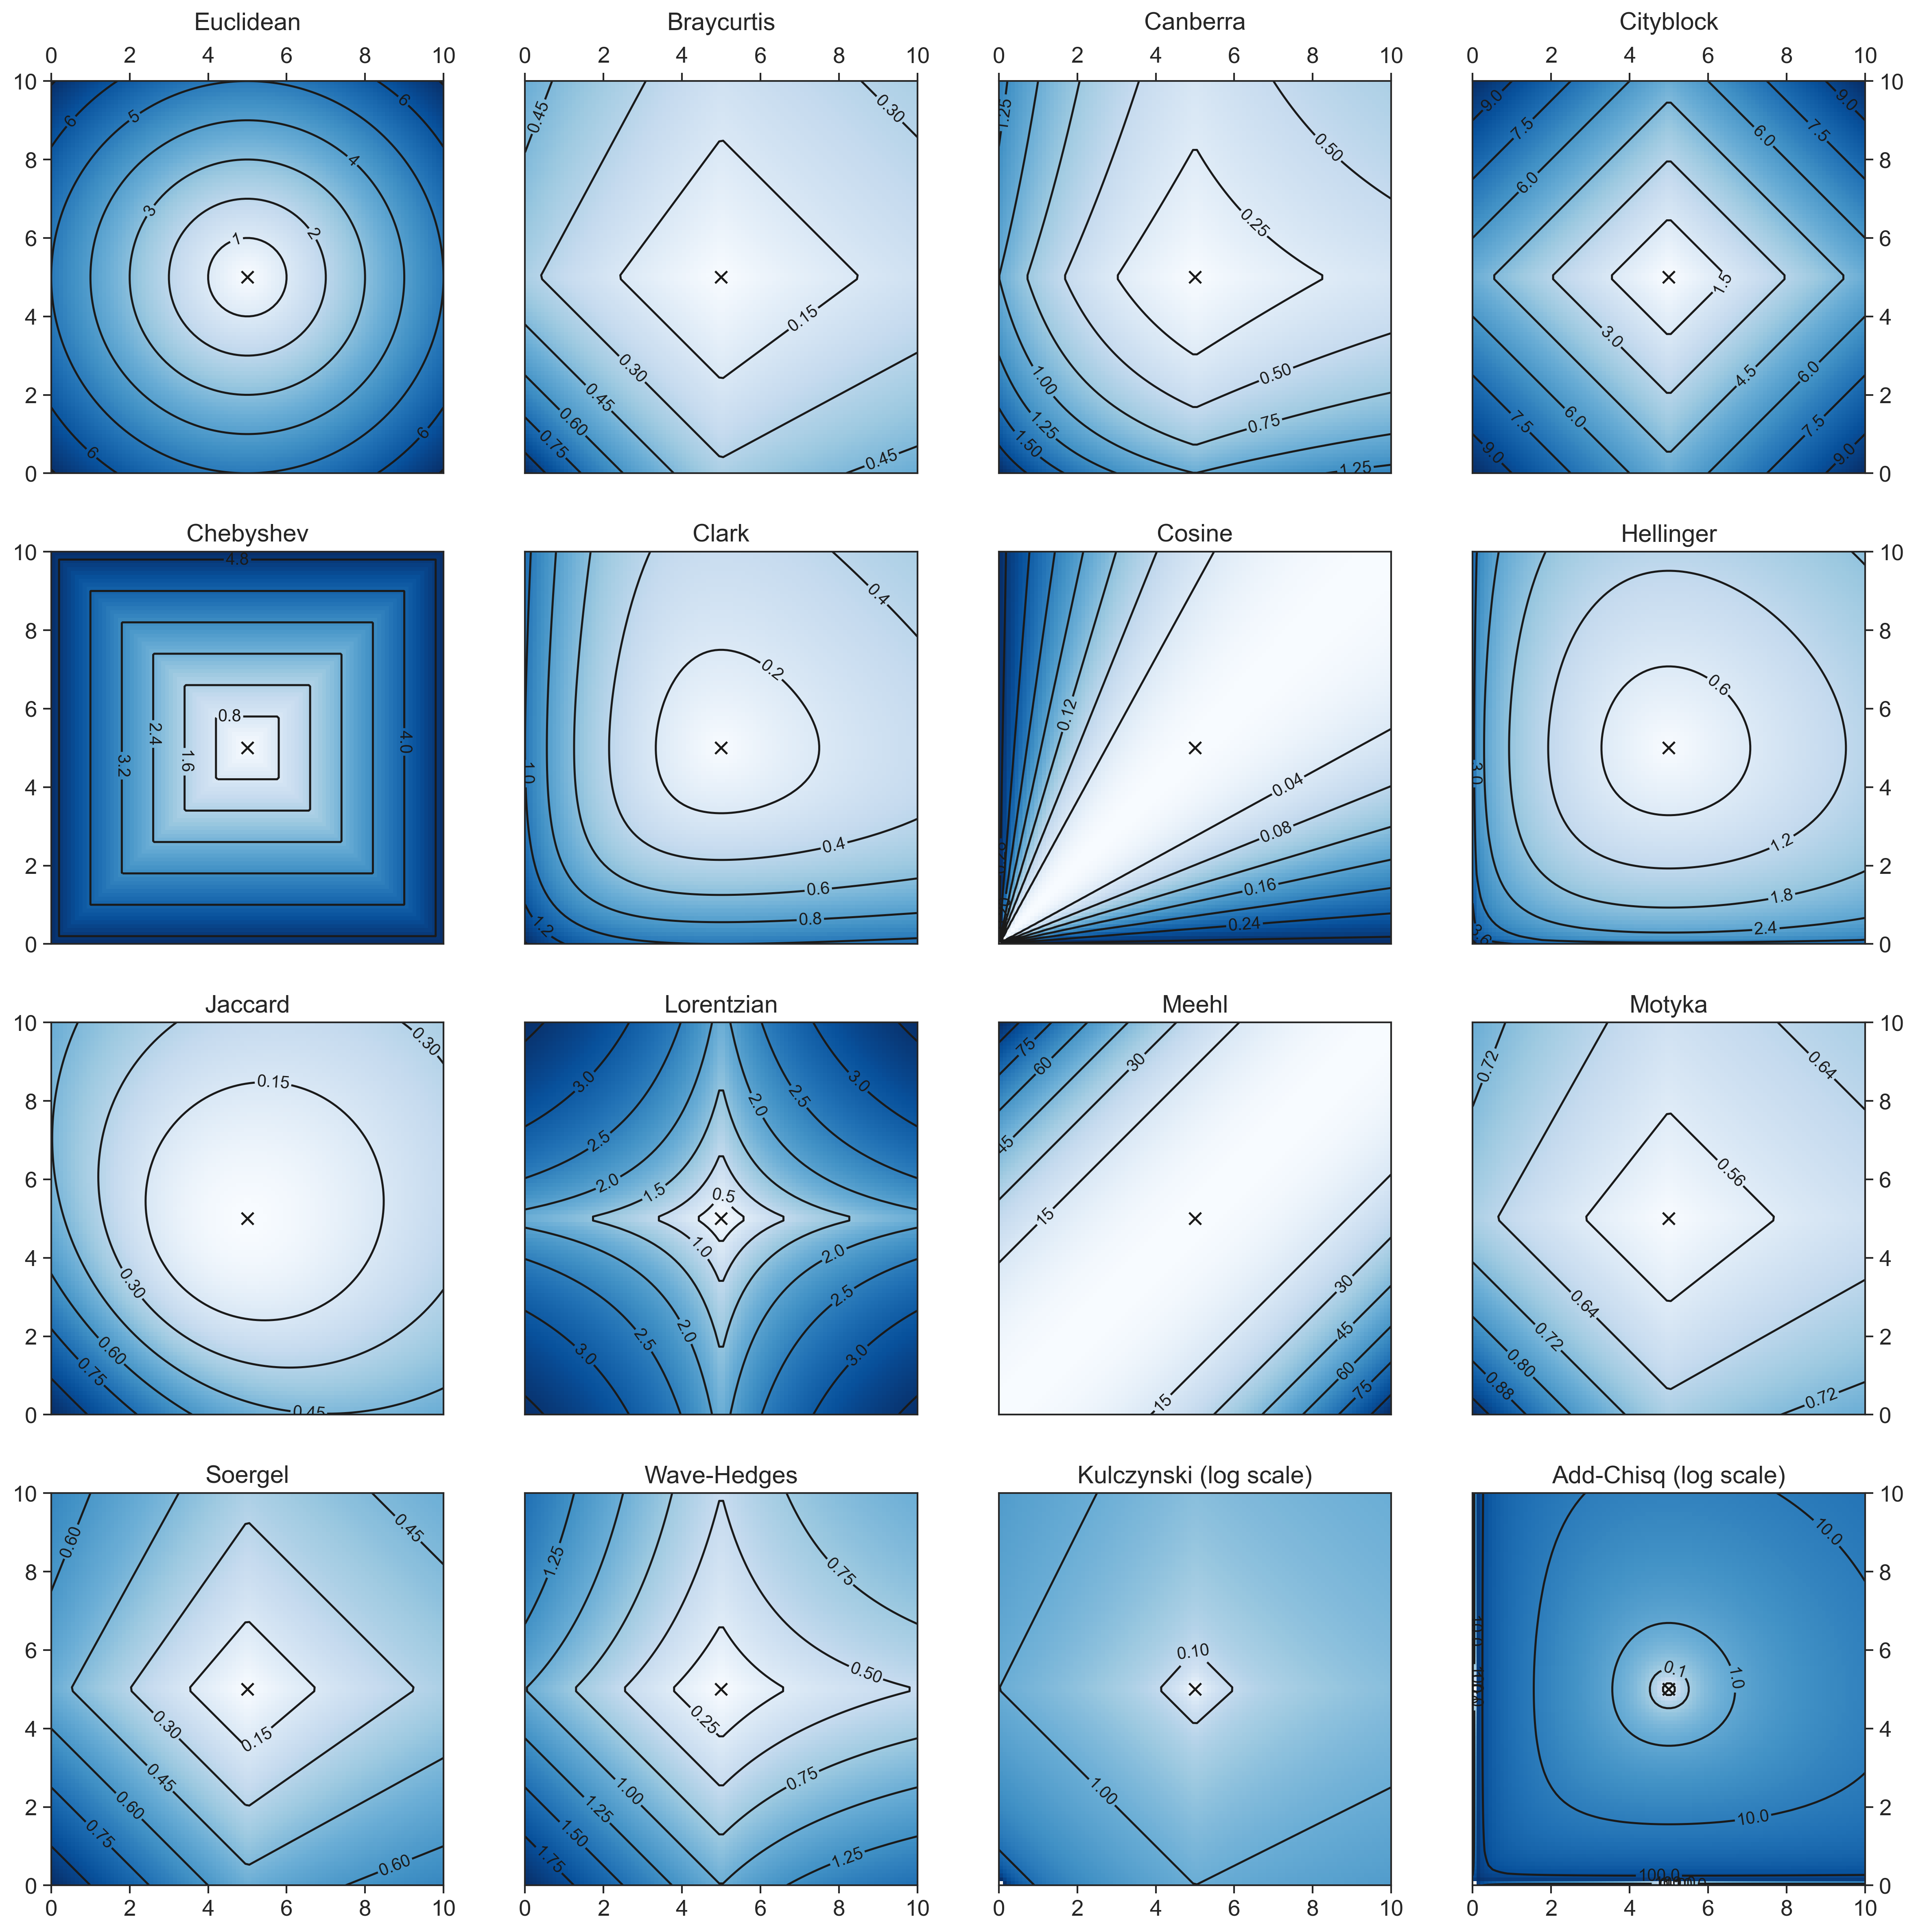

In [10]:
fig, axs = plt.subplots(4, 4, figsize=(19.2, 19.2), sharex=False, sharey=False)
for i, metricax in enumerate(zip(all_metrics, axs.ravel())):
    metric, ax = metricax
    metric_str = utils.get_metric_name(metric)
    distances = distance.cdist(ref_point.reshape(1, -1), points, metric=metric)
    distances = distances.reshape(X.shape)

    if metric_str not in ["Add_Chisq", "Kulczynski"]:
        # Make normal plot
        im = ax.imshow(
            distances,
            # cmap='viridis_r',
            cmap="Blues",
            interpolation="nearest",
            extent=[0, 10, 0, 10],
            origin="lower",
        )
        # cbar = fig.colorbar(im)
        ax.scatter(5, 5, s=50, color="k", marker="x")
        cs = ax.contour(X, Y, distances, colors="k")
        ax.clabel(cs, inline=True, fontsize=10, colors="k")
        ax.set_title(f"{metric_str.title().replace('_','-')}")

    else:
        # Make log plot
        im = ax.imshow(
            np.log10(distances),
            # cmap='viridis_r',
            cmap="Blues",
            interpolation="nearest",
            extent=[0, 10, 0, 10],
            origin="lower",
        )
        # cbar = fig.colorbar(im)
        ax.scatter(5, 5, s=50, color="k", marker="x")
        cs = ax.contour(X, Y, distances, colors="k", locator=ticker.LogLocator())
        ax.clabel(cs, inline=True, fontsize=10, colors="k")
        ax.set_title(f"{metric_str.title().replace('_','-')} (log scale)")

    if i % 4 == 0:
        ax.get_xaxis().set_visible(False)
    if i % 4 == 1 or i % 4 == 2:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    if i % 4 == 3:
        ax.set_yticklabels([0, 2, 4, 6, 8, 10])
        ax.get_xaxis().set_visible(False)
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")

    if i // 4 == 0:
        ax.get_xaxis().set_visible(True)
        ax.set_xticklabels([0, 2, 4, 6, 8, 10])
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position("top")
        ax.set_title(ax.get_title(), pad=10)

    if i // 4 == 4 - 1:
        ax.get_xaxis().set_visible(True)


# plt.suptitle(f"Distance from ({ref_point[0]}, {ref_point[1]})")
# fig.subplots_adjust(hspace=0.2, wspace=-0.5)
# plt.tight_layout()

Path("results").mkdir(parents=True, exist_ok=True)
plt.savefig(os.path.join("results", "distances_viz.pdf"), bbox_inches="tight")
plt.show()